<a href="https://colab.research.google.com/github/calzateu/Numerical_Analysis/blob/main/code/Sentiment_analysis/Naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('Dataset-with-sentiments.csv')

In [4]:
data.head(5)

,Unnamed: 0,Video ID,Comment ID,comments,polarity,pol_cat,stop_comments
0,0,MwpMEbgC7DA,UgxEo2shbVYOBPxhS2R4AaABAg,this song is so nostalgic sad but goo...,-0.100000,-1,song nostalgic sad good nostalgia
1,1,MwpMEbgC7DA,UgwyVvB0_bUiN_JBaIt4AaABAg,this is my favourite music,0.000000,-1,favourite music
2,2,MwpMEbgC7DA,UgzyDTnlLvy1oE13SHB4AaABAg,the perfect song for claire fraser,1.000000,1,perfect song claire fraser
3,3,MwpMEbgC7DA,UgzCD5ScVZF1QLfiRAB4AaABAg,who s sad and still listening in june ...,-0.450000,-1,sad still listening june 2021 never get tired ...
4,4,MwpMEbgC7DA,Ugx0ZotxLAxxHUPuBQ54AaABAg,i would cry because now i understand th...,0.061905,1,would cry understand song tears used update wr...


In [5]:
sum(data['stop_comments'].isnull())

2

In [6]:
data = data[data['stop_comments'].notnull()]

In [7]:
sum(data['stop_comments'].isnull())

0

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test = train_test_split(data['stop_comments'],data['pol_cat'],test_size = 0.2,random_state = 324)

In [10]:
X_train.shape

(852,)

In [11]:
X_test.shape

(213,)

In [12]:
data['pol_cat'].value_counts()

-1    563
 1    502
Name: pol_cat, dtype: int64

## **Gonna apply Naive Bayes**

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
vect = CountVectorizer()
tf_train = vect.fit_transform(X_train)
tf_test = vect.transform(X_test)

In [15]:
tf_train

<852x2434 sparse matrix of type '<class 'numpy.int64'>'
	with 8908 stored elements in Compressed Sparse Row format>

In [16]:
tf_train.shape

(852, 2434)

In [17]:
print(vect.vocabulary_)

{'promise': 1701, 'forever': 934, 'im': 1154, 'germany': 987, 'sitting': 1949, 'table': 2109, 'und': 2253, 'cry': 628, 'girlfriend': 998, 'dont': 736, 'love': 1354, 'best': 379, 'sad': 1835, 'song': 1995, 'ever': 824, 'fact': 867, 'hello': 1085, 'iraqi': 1204, 'come': 551, 'tik': 2166, 'tok': 2176, 'music': 1475, 'beautiful': 359, 'takes': 2113, 'away': 331, 'worries': 2392, 'world': 2389, 'thank': 2139, 'always': 277, 'delena': 681, '13': 52, 'reasons': 1759, 'another': 290, 'brings': 428, 'moments': 1455, 'life': 1306, 'crying': 631, 'listen': 1315, 'realize': 1751, 'short': 1917, 'still': 2047, 'like': 1308, 'baby': 334, 'ca': 451, 'believe': 373, 'masterpiece': 1396, 'became': 362, 'famous': 880, 'years': 2416, 'tom': 2179, 've': 2297, 'saved': 1847, 'cheated': 503, 'understand': 2255, 'get': 988, 'depressed': 690, 'make': 1380, 'feel': 896, 'calm': 458, 'everytime': 830, 'thanks': 2140, 'bro': 430, 'smmm': 1968, 'cause': 486, 'many': 1389, 'different': 716, 'ways': 2342, 'interpre

In [18]:
vocab = vect.vocabulary_

In [19]:
# Import TfidfTransformer class.
# TfidfTransformer transoforms count matrix to tf-idf representation.
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

# fit_transform transforms count matrix to tf-idf representation(vector).
X_train_tfidf = tfidf_transformer.fit_transform(tf_train)

Aplicando lo de TfidfTransformer mejora considerablemente. Buscar por qué

In [20]:
# Create model(naive bayes) and training. 
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, y_train)
#clf = MultinomialNB().fit(tf_train, y_train)

**Accuracy score on training dataset**

In [21]:
clf.score(tf_train, y_train)

0.9330985915492958

**Accuracy score on test dataset i.e got from the splitting**

In [22]:
clf.score(tf_test, y_test)

0.7887323943661971

**Make predictions on the test dataset i.e. unseen data to the model**

In [23]:
expected = y_test
predicted = clf.predict(tf_test)

**plot confusion matrix for the test dataset**

In [24]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

from sklearn import metrics

In [25]:
pip install mlxtend

[[83 24]
 [21 85]]


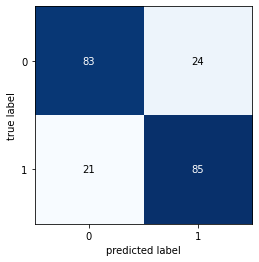

In [26]:
cf = metrics.confusion_matrix(expected,predicted,labels = [1,-1])
print(cf)
## this command is only for google collab 
## in the below figure " 1 is actually showing -1 and 0 is actually showing 1"
fig, ax = plot_confusion_matrix(conf_mat = cf)
                                
## It canbe used in any platform
# fig, ax = plot_confusion_matrix(conf_mat = cf, class_names = [1,-1])
plt.show()

In [27]:
from sklearn import metrics
print(metrics.classification_report(expected, predicted))
# print(metrics.confusion_matrix(expected,predicted))

              precision    recall  f1-score   support

          -1       0.78      0.80      0.79       106
           1       0.80      0.78      0.79       107

    accuracy                           0.79       213
   macro avg       0.79      0.79      0.79       213
weighted avg       0.79      0.79      0.79       213



**find the F1 score**

In [28]:
from sklearn.metrics import f1_score
f1_score(expected, predicted, average='macro')

0.7887137661192549